In [280]:
import pandas as pd
import numpy as np

In [281]:
df_plain = pd.read_csv("delhivery_data.csv")

In [282]:
df_plain.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [283]:
df_plain[(df_plain['actual_distance_to_destination'] == 27.637279)].head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor


In [284]:
df = pd.read_csv("delhivery_data.csv")

# 1. Basic data cleaning and exploration:

In [285]:
# Convert timestamp columns to datetime
# df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
# df['od_start_time'] = pd.to_datetime(df['od_start_time'])
# df['cutoff_timestamp'] = pd.to_datetime(df['cutoff_timestamp'],errors='coerce')

# Understand the data

In [286]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [288]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [289]:
df['data'].unique()


array(['training', 'test'], dtype=object)

In [373]:
df = df_plain[df_plain['data'] == 'training']
testing_df  = df_plain[df_plain['data'] == 'test']

In [375]:
df['data'].unique()


array(['training'], dtype=object)

In [367]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_key', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
       'segment_osrm_time_sum'],
      dtype='object')

# Describe the data

In [290]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


# check the type of each column

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

## 1. Handle missing values in the data.

In [293]:
df.isnull().sum()
#NA - handle by dropna
#NAN, NIL, NAT

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [294]:
df.dropna(inplace=True)

In [295]:
df.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   source_name                     144316 non-null  object 
 7   destination_center              144316 non-null  object 
 8   destination_name                144316 non-null  object 
 9   od_start_time                   144316 non-null  object 
 10  od_end_time                     144316 non-null  object 
 11  start_scan_to_end_scan          144316 non-null  float64
 12  is_cutoff            

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   source_name                     144316 non-null  object 
 7   destination_center              144316 non-null  object 
 8   destination_name                144316 non-null  object 
 9   od_start_time                   144316 non-null  object 
 10  od_end_time                     144316 non-null  object 
 11  start_scan_to_end_scan          144316 non-null  float64
 12  is_cutoff            

In [298]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [299]:
#df['segment_actual_time'].dtype
df['segment_osrm_time'].dtype

dtype('float64')

## 1.2 Converting time columns into pandas datetime.
#### trip_creation_time
#### od_start_time
#### od_end_time

In [300]:
# Convert timestamp columns to datetime

df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['cutoff_timestamp'] = pd.to_datetime(df['cutoff_timestamp'],format='mixed')
df['od_end_time'] = pd.to_datetime(df['od_end_time'],format='mixed')

# df['cutoff_timestamp'] = pd.to_datetime(df['cutoff_timestamp'],errors='coerce')

In [301]:
df['cutoff_timestamp'].head(30)

0    2018-09-20 04:27:55.000000
1    2018-09-20 04:17:55.000000
2    2018-09-20 04:01:19.505586
3    2018-09-20 03:39:57.000000
4    2018-09-20 03:33:55.000000
5    2018-09-20 06:15:58.000000
6    2018-09-20 05:47:29.000000
7    2018-09-20 05:25:58.000000
8    2018-09-20 05:15:56.000000
9    2018-09-20 04:49:20.000000
10   2018-09-23 11:05:19.000000
11   2018-09-23 10:27:22.000000
12   2018-09-23 09:45:25.000000
13   2018-09-23 09:21:27.000000
14   2018-09-23 08:39:31.000000
15   2018-09-14 16:29:54.000000
16   2018-09-14 16:15:53.000000
17   2018-09-13 23:25:20.000000
18   2018-09-13 22:47:26.000000
19   2018-09-14 12:45:25.000000
20   2018-09-14 12:15:21.000000
21   2018-09-14 10:41:26.000000
22   2018-09-14 09:39:25.000000
23   2018-09-14 08:49:29.000000
24   2018-09-14 08:11:24.000000
25   2018-09-14 07:45:24.000000
26   2018-09-14 07:17:29.000000
27   2018-09-14 06:51:25.000000
28   2018-09-14 06:15:26.000000
29   2018-09-14 05:49:24.000000
Name: cutoff_timestamp, dtype: datetime6

## 1.3 Analyze structure & characteristics of the dataset.

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime64[n

In [303]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144316,144316,144316,144316.000000,144316.000000,144316,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
mean,2018-09-22 13:05:09.454117120,2018-09-22 17:32:42.435769344,2018-09-23 09:36:54.057172224,963.697698,233.561345,2018-09-23 02:03:47.744481536,234.708498,417.996237,214.437055,285.549785,2.120178,36.175379,18.495697,22.818993,2.218707
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000000,2018-09-12 00:02:09.740725,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.000000,-23.444444
25%,2018-09-17 02:46:11.004421120,2018-09-17 07:37:35.014584832,2018-09-18 01:29:56.978912,161.000000,22.000000,2018-09-17 18:30:36.750000128,23.352027,51.000000,27.000000,29.896250,1.604545,20.000000,11.000000,12.053975,1.347826
50%,2018-09-22 03:36:19.186585088,2018-09-22 07:35:23.038482944,2018-09-23 02:49:00.936600064,451.000000,66.000000,2018-09-22 19:27:22,66.135322,132.000000,64.000000,78.624400,1.857143,28.000000,17.000000,23.508300,1.684211
75%,2018-09-27 17:53:19.027942912,2018-09-27 22:01:30.861209088,2018-09-28 12:13:41.675546112,1645.000000,286.000000,2018-09-28 04:56:21.500000,286.919294,516.000000,259.000000,346.305400,2.212280,40.000000,22.000000,27.813325,2.250000
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.000000,2018-10-06 23:44:12,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.403700,574.250000
std,NaN,NaN,NaN,1038.082976,345.245823,NaN,345.480571,598.940065,308.448543,421.717826,1.717065,53.524298,14.774008,17.866367,4.854804


In [304]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [305]:
df['data'].unique()

array(['training', 'test'], dtype=object)

In [306]:
df['route_type'].unique()

array(['Carting', 'FTL'], dtype=object)

In [307]:
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [308]:
timediff = df['od_end_time'] - df['od_start_time']


In [309]:
timediff

0        0 days 01:26:12.818197
1        0 days 01:26:12.818197
2        0 days 01:26:12.818197
3        0 days 01:26:12.818197
4        0 days 01:26:12.818197
                  ...          
144862   0 days 07:07:41.181838
144863   0 days 07:07:41.181838
144864   0 days 07:07:41.181838
144865   0 days 07:07:41.181838
144866   0 days 07:07:41.181838
Length: 144316, dtype: timedelta64[ns]

In [310]:
anand_df = df[df['source_name'] == 'Anand_VUNagar_DC (Gujarat)']

In [311]:
anand_df[anand_df['od_start_time'] == '2018-09-15 02:45:51.630859']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
104285,training,2018-09-15 02:07:37.987764,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153697725798753764,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-15 02:45:51.630859,...,2018-09-15 04:01:57,9.204863,11.0,8.0,9.6130,1.375000,11.0,8.0,9.6130,1.375000
104286,training,2018-09-15 02:07:37.987764,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153697725798753764,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-15 02:45:51.630859,...,2018-09-15 03:49:27,18.882666,24.0,19.0,20.9125,1.263158,12.0,10.0,11.2995,1.200000
104287,training,2018-09-15 02:07:37.987764,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153697725798753764,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-15 02:45:51.630859,...,2018-09-15 03:29:55,27.746577,43.0,26.0,31.6611,1.653846,19.0,7.0,10.7486,2.714286
104288,training,2018-09-15 02:07:37.987764,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153697725798753764,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-15 02:45:51.630859,...,2018-09-15 03:09:54,37.544126,64.0,41.0,46.0091,1.560976,20.0,14.0,14.3480,1.428571
104289,training,2018-09-15 02:07:37.987764,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153697725798753764,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-15 02:45:51.630859,...,2018-09-15 03:05:57,39.066701,67.0,43.0,52.8668,1.558140,3.0,2.0,1.8967,1.500000


In [312]:
anand_df_sorted = anand_df.sort_values(by='actual_time', ascending=True)

In [313]:
anand_df_sorted.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
104285,training,2018-09-15 02:07:37.987764,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153697725798753764,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-15 02:45:51.630859,...,2018-09-15 04:01:57,9.204863,11.0,8.0,9.6130,1.375000,11.0,8.0,9.6130,1.375000
50748,training,2018-09-13 01:49:58.699556,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153680339869927048,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-13 02:33:49.098593,...,2018-09-13 03:49:22,10.196775,12.0,11.0,11.6022,1.090909,12.0,11.0,11.6022,1.090909
107994,test,2018-09-29 02:31:21.536224,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153818828153597720,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-29 03:25:24.299375,...,2018-09-29 04:37:55,9.533858,13.0,10.0,10.8873,1.300000,13.0,10.0,10.8873,1.300000
75064,test,2018-09-28 02:28:11.367855,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153810169136762438,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-28 04:54:26.905637,...,2018-09-28 05:57:58,10.932187,13.0,11.0,12.4196,1.181818,13.0,11.0,12.4196,1.181818
128895,training,2018-09-12 02:08:35.096977,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153671811509671845,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-12 02:52:16.924167,...,2018-09-12 04:17:56,10.369447,13.0,11.0,11.9186,1.181818,13.0,11.0,11.9186,1.181818


## 

Try merging the rows using the hint mentioned below.
Since delivery details of one package is divided into several rows (think of it as
connecting flights to reach a particular destination).
Now think about…
● How should we treat their fields if we combine these rows?
● What aggregation would make sense if we merge?
● What would happen to the numeric fields if we merge the rows?

1. Grouping by segment
a. Create a unique identifier for different segments of a trip based on the
combination of the trip_uuid, source_center, and destination_center and
name it as segment_key.

In [314]:
# Step 1: Grouping by segment
# a. Create a unique identifier for different segments of a trip
df['segment_key'] = df['trip_uuid'].astype(str) + '_' + df['source_center'] + '_' + df['destination_center']

In [315]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320_IND388121AAA_IND388620AAB
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320_IND388121AAA_IND388620AAB
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320_IND388121AAA_IND388620AAB
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320_IND388121AAA_IND388620AAB
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320_IND388121AAA_IND388620AAB


In [316]:
# b. Group by segment_key and aggregate using cumsum
df['segment_actual_time_sum'] = df.groupby('segment_key')['segment_actual_time'].cumsum()
df['segment_osrm_distance_sum'] = df.groupby('segment_key')['segment_osrm_distance'].cumsum()
df['segment_osrm_time_sum'] = df.groupby('segment_key')['segment_osrm_time'].cumsum()


In [317]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320_IND388121AAA_IND388620AAB,14.0,11.9653,11.0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320_IND388121AAA_IND388620AAB,24.0,21.7243,20.0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320_IND388121AAA_IND388620AAB,40.0,32.5395,27.0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320_IND388121AAA_IND388620AAB,61.0,45.5619,39.0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.4772,44.0


In [318]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_key', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
       'segment_osrm_time_sum'],
      dtype='object')

### Aggregating at segment level

a. Create a dictionary named create_segment_dict, that defines how to aggregate and select values.

    i. You can keep the first and last values for some numeric/categorical fields if aggregating them won’t make sense.

In [319]:
# Step 2: Aggregating at segment level
# a. Create a dictionary defining how to aggregate and select values
# Create a dictionary for aggregating at the segment level
create_segment_dict = {
    'data': 'last',
    'trip_creation_time': 'last',
    'route_schedule_uuid': 'last',
    'route_type': 'last',
    'trip_uuid': 'last',
    'source_center': 'last',
    'source_name': 'last',
    'destination_center': 'last',
    'destination_name': 'last',
    'od_start_time': 'last',
    'od_end_time': 'last',
    'start_scan_to_end_scan': 'sum',  # Example: Use sum for cumulative fields
    'is_cutoff': 'last',
    'cutoff_factor': 'last',
    'cutoff_timestamp': 'last',
    'actual_distance_to_destination': 'sum',  # Example: Use sum for cumulative fields
    'actual_time': 'sum',  # Example: Use sum for cumulative fields
    'osrm_time': 'sum',  # Example: Use sum for cumulative fields
    'osrm_distance': 'sum',  # Example: Use sum for cumulative fields
    'factor': 'last',
    'segment_actual_time': 'sum',  # Example: Use sum for cumulative fields
    'segment_osrm_time': 'sum',  # Example: Use sum for cumulative fields
    'segment_osrm_distance': 'sum',  # Example: Use sum for cumulative fields
    'segment_factor': 'last',
    'segment_key': 'last',
    'segment_actual_time_sum': 'sum',
    'segment_osrm_distance_sum': 'sum',
    'segment_osrm_time_sum': 'sum',
}


### 

b. Further group the data by segment_key because you want to perform aggregation operations for different segments of each trip based on the segment_key value.

In [320]:


# b. Further group the data by segment_key
segment_grouped = df.groupby('segment_key')



In [321]:

# c. Apply aggregation functions specified in create_segment_dict
segment = segment_grouped.agg(create_segment_dict)


c. The aggregation functions specified in the create_segment_dict are applied to each group of rows with the same segment_key.

In [322]:
# # b. Further group the data by segment_key
# segment_grouped = df.groupby('segment_key')

# # c. Apply aggregation functions specified in create_segment_dict
# segment = segment_grouped.agg(create_segment_dict)

# Check if 'segment_key' column already exists in the result
if 'segment_key' in segment.columns:
    # If it exists, drop the existing 'segment_key' column before resetting the index
    segment = segment.drop(columns=['segment_key'])

# Reset the index
segment = segment.reset_index()




In [323]:
segment.columns

Index(['segment_key', 'data', 'trip_creation_time', 'route_schedule_uuid',
       'route_type', 'trip_uuid', 'source_center', 'source_name',
       'destination_center', 'destination_name', 'od_start_time',
       'od_end_time', 'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_actual_time_sum', 'segment_osrm_distance_sum',
       'segment_osrm_time_sum'],
      dtype='object')

In [324]:
segment.head()

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,...,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),...,3464.0,4540.1261,2.224924,728.0,534.0,670.6205,2.000000,6434.0,6343.4400,5032.0
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),...,4323.0,6037.6386,2.139175,820.0,474.0,649.8528,7.333333,9082.0,7878.6704,5638.0
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),...,55.0,60.3157,1.807692,46.0,26.0,28.1995,2.142857,95.0,60.3159,55.0
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),...,155.0,209.1151,2.285714,95.0,39.0,55.9899,6.666667,301.0,208.1935,144.0
4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),...,1427.0,1975.7409,2.882075,608.0,231.0,317.7408,9.821429,2584.0,2062.8567,1476.0


In [325]:
# Sort the resulting DataFrame segment by two criteria
segment = segment.sort_values(by=['segment_key', 'od_end_time'], ascending=[True, True])


In [326]:
# Reset the index after sorting
segment = segment.reset_index(drop=True)

In [327]:
segment.head()

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,...,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),...,3464.0,4540.1261,2.224924,728.0,534.0,670.6205,2.000000,6434.0,6343.4400,5032.0
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),...,4323.0,6037.6386,2.139175,820.0,474.0,649.8528,7.333333,9082.0,7878.6704,5638.0
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),...,55.0,60.3157,1.807692,46.0,26.0,28.1995,2.142857,95.0,60.3159,55.0
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),...,155.0,209.1151,2.285714,95.0,39.0,55.9899,6.666667,301.0,208.1935,144.0
4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),...,1427.0,1975.7409,2.882075,608.0,231.0,317.7408,9.821429,2584.0,2062.8567,1476.0


# 3. Feature Engineering:

Extract features from the below fields:

1. Calculate time taken between od_start_time and od_end_time and keep it as a feature named od_time_diff_hour. Drop the original columns, if required.

In [328]:
segment.columns

Index(['segment_key', 'data', 'trip_creation_time', 'route_schedule_uuid',
       'route_type', 'trip_uuid', 'source_center', 'source_name',
       'destination_center', 'destination_name', 'od_start_time',
       'od_end_time', 'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_actual_time_sum', 'segment_osrm_distance_sum',
       'segment_osrm_time_sum'],
      dtype='object')

In [329]:
segment.head()

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,...,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),...,3464.0,4540.1261,2.224924,728.0,534.0,670.6205,2.000000,6434.0,6343.4400,5032.0
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),...,4323.0,6037.6386,2.139175,820.0,474.0,649.8528,7.333333,9082.0,7878.6704,5638.0
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),...,55.0,60.3157,1.807692,46.0,26.0,28.1995,2.142857,95.0,60.3159,55.0
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),...,155.0,209.1151,2.285714,95.0,39.0,55.9899,6.666667,301.0,208.1935,144.0
4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),...,1427.0,1975.7409,2.882075,608.0,231.0,317.7408,9.821429,2584.0,2062.8567,1476.0


In [330]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   segment_key                     26222 non-null  object        
 1   data                            26222 non-null  object        
 2   trip_creation_time              26222 non-null  datetime64[ns]
 3   route_schedule_uuid             26222 non-null  object        
 4   route_type                      26222 non-null  object        
 5   trip_uuid                       26222 non-null  object        
 6   source_center                   26222 non-null  object        
 7   source_name                     26222 non-null  object        
 8   destination_center              26222 non-null  object        
 9   destination_name                26222 non-null  object        
 10  od_start_time                   26222 non-null  datetime64[ns]
 11  od

In [331]:
segment['od_time_diff_hour'] = segment['od_start_time'] - segment['od_end_time']

In [332]:
segment['od_time_diff_hour'].head()

0   -1 days +02:59:23.734725
1   -1 days +07:20:29.677272
2   -1 days +23:01:10.056736
3   -1 days +21:57:13.230839
4   -1 days +10:05:21.664279
Name: od_time_diff_hour, dtype: timedelta64[ns]

In [333]:
# Assuming 'od_time_diff_hour' is the column you want to convert
segment['od_time_diff_hour'] = segment['od_time_diff_hour'] / pd.Timedelta(minutes=1)

# Display the result
print(segment['od_time_diff_hour'])


0       -1260.604421
1        -999.505379
2         -58.832388
3        -122.779486
4        -834.638929
            ...     
26217     -62.115193
26218     -91.087797
26219     -44.174403
26220    -287.474007
26221     -66.933565
Name: od_time_diff_hour, Length: 26222, dtype: float64


In [334]:
## Drop the original columns if required
columns_to_drop = ['od_start_time', 'od_end_time']

In [335]:


segment = segment.drop(columns=columns_to_drop, errors='ignore')

In [336]:
segment.isna().sum()

segment_key                       0
data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
segment_actual_time_sum           0
segment_osrm_distance_sum         0
segment_osrm_time_sum             0
od_time_diff_hour                 0
dtype: int64

In [337]:
# Print the sum of 'nan' values in each column
nan_sum_per_column = (segment.astype(str) == 'nan').sum()
print("Sum of 'nan' values in each column:")
print(nan_sum_per_column)


Sum of 'nan' values in each column:
segment_key                       0
data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
segment_actual_time_sum           0
segment_osrm_distance_sum         0
segment_osrm_time_sum             0
od_time_diff_hour           

In [338]:
segment[segment['destination_name'] == 'nan']

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,...,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour


In [339]:
val = 'Khambhat_MotvdDPP_D (Gujarat)'

str(val.split('(')[1]).split(')')[0]


'Gujarat'

In [340]:
val.split("_")[0]


'Khambhat'

In [341]:
# Apply the logic to extract the city name
segment['destination_city'] = segment['destination_name'].apply(lambda val: val.split("_")[0])

# Print the result
print(segment['destination_city'])


0              Gurgaon
1               Kanpur
2           Chikblapur
3           Doddablpur
4           Chandigarh
             ...      
26217    Thisayanvilai
26218      Tirunelveli
26219       Tirchchndr
26220          Bellary
26221           Sandur
Name: destination_city, Length: 26222, dtype: object


In [342]:
# Apply the logic to extract the city name
segment['source_city'] = segment['source_name'].apply(lambda val: val.split("_")[0])

# Print the result
print(segment['source_city'])


0                    Kanpur
1                    Bhopal
2                Doddablpur
3                    Tumkur
4                   Gurgaon
                ...        
26217            Tirchchndr
26218              Peikulam
26219                  Eral
26220                Sandur
26221    Hospet (Karnataka)
Name: source_city, Length: 26222, dtype: object


In [343]:
segment.columns

Index(['segment_key', 'data', 'trip_creation_time', 'route_schedule_uuid',
       'route_type', 'trip_uuid', 'source_center', 'source_name',
       'destination_center', 'destination_name', 'start_scan_to_end_scan',
       'is_cutoff', 'cutoff_factor', 'cutoff_timestamp',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'segment_actual_time_sum',
       'segment_osrm_distance_sum', 'segment_osrm_time_sum',
       'od_time_diff_hour', 'destination_city', 'source_city'],
      dtype='object')

In [344]:
segment['trip_creation_time']

0       2018-09-12 00:00:16.535741
1       2018-09-12 00:00:16.535741
2       2018-09-12 00:00:22.886430
3       2018-09-12 00:00:22.886430
4       2018-09-12 00:00:33.691250
                   ...            
26217   2018-10-03 23:59:14.390954
26218   2018-10-03 23:59:14.390954
26219   2018-10-03 23:59:14.390954
26220   2018-10-03 23:59:42.701692
26221   2018-10-03 23:59:42.701692
Name: trip_creation_time, Length: 26222, dtype: datetime64[ns]

In [345]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   segment_key                     26222 non-null  object        
 1   data                            26222 non-null  object        
 2   trip_creation_time              26222 non-null  datetime64[ns]
 3   route_schedule_uuid             26222 non-null  object        
 4   route_type                      26222 non-null  object        
 5   trip_uuid                       26222 non-null  object        
 6   source_center                   26222 non-null  object        
 7   source_name                     26222 non-null  object        
 8   destination_center              26222 non-null  object        
 9   destination_name                26222 non-null  object        
 10  start_scan_to_end_scan          26222 non-null  float64       
 11  is

In [346]:
# Extract features
segment['year'] = segment['trip_creation_time'].dt.year
segment['month'] = segment['trip_creation_time'].dt.month
segment['day'] = segment['trip_creation_time'].dt.day
segment['hour'] = segment['trip_creation_time'].dt.hour
segment['minute'] = segment['trip_creation_time'].dt.minute

In [347]:
segment[['trip_creation_time','year', 'month', 'day', 'hour','minute']]

,trip_creation_time,year,month,day,hour,minute
0,2018-09-12 00:00:16.535741,2018,9,12,0,0
1,2018-09-12 00:00:16.535741,2018,9,12,0,0
2,2018-09-12 00:00:22.886430,2018,9,12,0,0
3,2018-09-12 00:00:22.886430,2018,9,12,0,0
4,2018-09-12 00:00:33.691250,2018,9,12,0,0
...,...,...,...,...,...,...
26217,2018-10-03 23:59:14.390954,2018,10,3,23,59
26218,2018-10-03 23:59:14.390954,2018,10,3,23,59
26219,2018-10-03 23:59:14.390954,2018,10,3,23,59
26220,2018-10-03 23:59:42.701692,2018,10,3,23,59


In [348]:
segment.head()

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,...,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour,destination_city,source_city,year,month,day,hour,minute
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),...,6343.4400,5032.0,-1260.604421,Gurgaon,Kanpur,2018,9,12,0,0
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),...,7878.6704,5638.0,-999.505379,Kanpur,Bhopal,2018,9,12,0,0
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),...,60.3159,55.0,-58.832388,Chikblapur,Doddablpur,2018,9,12,0,0
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),...,208.1935,144.0,-122.779486,Doddablpur,Tumkur,2018,9,12,0,0
4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),...,2062.8567,1476.0,-834.638929,Chandigarh,Gurgaon,2018,9,12,0,0


In [349]:
# Group by 'trip_uuid'
trip_grouped = segment.groupby('trip_uuid')

In [350]:
trip_grouped.head()

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,...,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour,destination_city,source_city,year,month,day,hour,minute
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),...,6343.4400,5032.0,-1260.604421,Gurgaon,Kanpur,2018,9,12,0,0
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),...,7878.6704,5638.0,-999.505379,Kanpur,Bhopal,2018,9,12,0,0
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),...,60.3159,55.0,-58.832388,Chikblapur,Doddablpur,2018,9,12,0,0
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),...,208.1935,144.0,-122.779486,Doddablpur,Tumkur,2018,9,12,0,0
4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),...,2062.8567,1476.0,-834.638929,Chandigarh,Gurgaon,2018,9,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069_IND628204AAA_IND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),...,105.9520,107.0,-62.115193,Thisayanvilai,Tirchchndr,2018,10,3,23,59
26218,trip-153861115439069069_IND628613AAA_IND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),...,164.2574,144.0,-91.087797,Tirunelveli,Peikulam,2018,10,3,23,59
26219,trip-153861115439069069_IND628801AAA_IND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),...,25.5370,22.0,-44.174403,Tirchchndr,Eral,2018,10,3,23,59
26220,trip-153861118270144424_IND583119AAA_IND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),...,76.5169,59.0,-287.474007,Bellary,Sandur,2018,10,3,23,59


In [351]:
segment.columns

Index(['segment_key', 'data', 'trip_creation_time', 'route_schedule_uuid',
       'route_type', 'trip_uuid', 'source_center', 'source_name',
       'destination_center', 'destination_name', 'start_scan_to_end_scan',
       'is_cutoff', 'cutoff_factor', 'cutoff_timestamp',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'segment_actual_time_sum',
       'segment_osrm_distance_sum', 'segment_osrm_time_sum',
       'od_time_diff_hour', 'destination_city', 'source_city', 'year', 'month',
       'day', 'hour', 'minute'],
      dtype='object')

In [352]:
create_trip_dict = {
    'segment_key': 'last',
    'data': 'last',
    'trip_creation_time': 'first',
    'route_schedule_uuid': 'last',
    'route_type': 'last',
    'trip_uuid': 'last',
    'source_center': 'first',
    'source_name': 'first',
    'destination_center': 'last',
    'destination_name': 'last',
    'start_scan_to_end_scan': 'sum',
    'is_cutoff': 'last',
    'cutoff_factor': 'last',
    'cutoff_timestamp': 'last',
    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    'factor': 'last',
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum',
    'segment_factor': 'last',
    'segment_actual_time_sum': 'last',
    'segment_osrm_distance_sum': 'last',
    'segment_osrm_time_sum': 'last',
    'od_time_diff_hour': 'last',
    'destination_city': 'last',
    'source_city': 'last',
    'year': 'last',
    'month': 'last',
    'day': 'last',
    'hour': 'last',
    'minute': 'last',
}


In [353]:
# Apply aggregation functions specified in create_trip_dict
trip_summary = trip_grouped.agg(create_trip_dict)

# Print the result
print(trip_summary)

                                                               segment_key  \
trip_uuid                                                                    
trip-153671041653548748  trip-153671041653548748_IND462022AAA_IND209304AAA   
trip-153671042288605164  trip-153671042288605164_IND572101AAA_IND561203AAB   
trip-153671043369099517  trip-153671043369099517_IND562132AAA_IND000000ACB   
trip-153671046011330457  trip-153671046011330457_IND400072AAB_IND401104AAA   
trip-153671052974046625  trip-153671052974046625_IND583201AAA_IND583119AAA   
...                                                                    ...   
trip-153861095625827784  trip-153861095625827784_IND160102AAD_IND160002AAC   
trip-153861104386292051  trip-153861104386292051_IND121004AAB_IND121004AAA   
trip-153861106442901555  trip-153861106442901555_IND209304AAA_IND208006AAA   
trip-153861115439069069  trip-153861115439069069_IND628801AAA_IND628204AAA   
trip-153861118270144424  trip-153861118270144424_IND583201AAA_IN

In [354]:
trip_summary.columns


Index(['segment_key', 'data', 'trip_creation_time', 'route_schedule_uuid',
       'route_type', 'trip_uuid', 'source_center', 'source_name',
       'destination_center', 'destination_name', 'start_scan_to_end_scan',
       'is_cutoff', 'cutoff_factor', 'cutoff_timestamp',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'segment_actual_time_sum',
       'segment_osrm_distance_sum', 'segment_osrm_time_sum',
       'od_time_diff_hour', 'destination_city', 'source_city', 'year', 'month',
       'day', 'hour', 'minute'],
      dtype='object')

In [355]:
trip_summary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14787 entries, trip-153671041653548748 to trip-153861118270144424
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   segment_key                     14787 non-null  object        
 1   data                            14787 non-null  object        
 2   trip_creation_time              14787 non-null  datetime64[ns]
 3   route_schedule_uuid             14787 non-null  object        
 4   route_type                      14787 non-null  object        
 5   trip_uuid                       14787 non-null  object        
 6   source_center                   14787 non-null  object        
 7   source_name                     14787 non-null  object        
 8   destination_center              14787 non-null  object        
 9   destination_name                14787 non-null  object        
 10  start_scan_to_end_scan          147

c:\Users\babas\anaconda3\envs\rasapy39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\babas\anaconda3\envs\rasapy39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\babas\anaconda3\envs\rasapy39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\babas\anaconda3\envs\rasapy39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

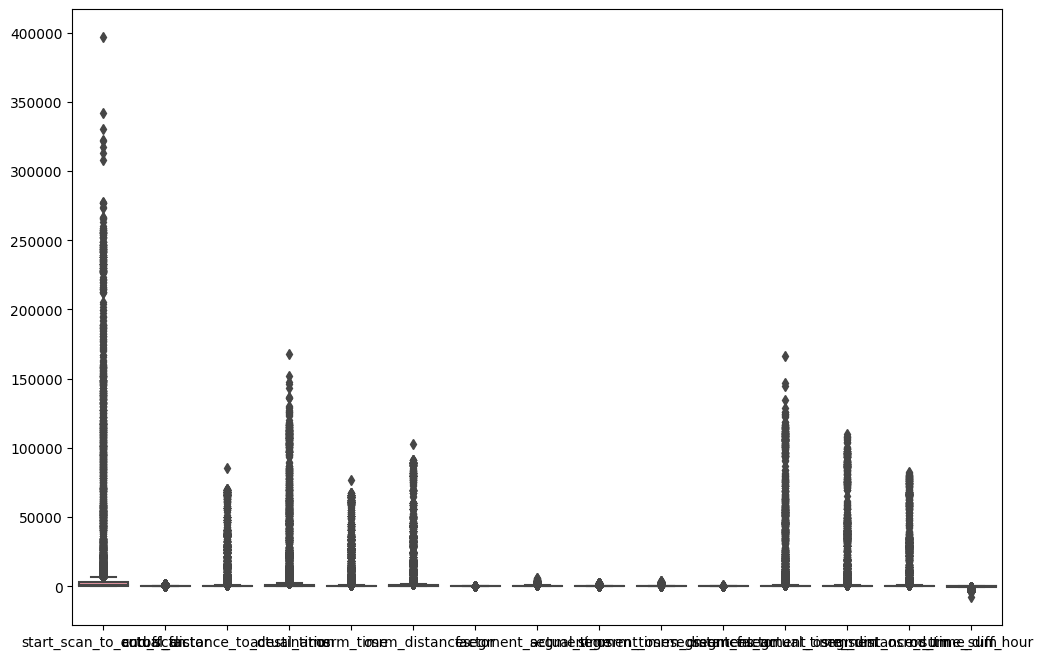

In [356]:


# Assuming your dataframe is named 'df'
numerical_features = trip_summary.select_dtypes(include=['float64', 'int64'])

# Calculate the IQR for each numerical feature
Q1 = numerical_features.quantile(0.25)
Q3 = numerical_features.quantile(0.75)
IQR = Q3 - Q1

# Identify potential outliers
outliers = ((numerical_features < (Q1 - 1.5 * IQR)) | (numerical_features > (Q3 + 1.5 * IQR)))

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting environment
plt.figure(figsize=(12, 8))

# Create boxplots for numerical features
sns.boxplot(data=numerical_features)

# Display the plot
plt.show()



In [357]:
# Handle outliers using the IQR method
df_no_outliers = trip_summary.copy()

# Replace outliers with NaN
#df_no_outliers[outliers] = None




In [358]:
#Alternatively, you can remove rows containing outliers
df_no_outliers = df_no_outliers[~outliers.any(axis=1)]

In [359]:

# Specify the categorical columns for one-hot encoding
categorical_columns = ['route_type', 'source_center', 'destination_center', 'is_cutoff']

# Use get_dummies to perform one-hot encoding
df_encoded = pd.get_dummies(df_no_outliers, columns=categorical_columns)

# Print the result
print(df_encoded)


                                                               segment_key  \
trip_uuid                                                                    
trip-153671046011330457  trip-153671046011330457_IND400072AAB_IND401104AAA   
trip-153671055416136166  trip-153671055416136166_IND600116AAB_IND600056AAA   
trip-153671066201138152  trip-153671066201138152_IND600044AAD_IND600048AAA   
trip-153671066826362165  trip-153671066826362165_IND560064AAD_IND560043AAC   
trip-153671074033284934  trip-153671074033284934_IND395023AAD_IND395004AAB   
...                                                                    ...   
trip-153861095625827784  trip-153861095625827784_IND160102AAD_IND160002AAC   
trip-153861104386292051  trip-153861104386292051_IND121004AAB_IND121004AAA   
trip-153861106442901555  trip-153861106442901555_IND209304AAA_IND208006AAA   
trip-153861115439069069  trip-153861115439069069_IND628801AAA_IND628204AAA   
trip-153861118270144424  trip-153861118270144424_IND583201AAA_IN

In [360]:
df_no_outliers.head()

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,...,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour,destination_city,source_city,year,month,day,hour,minute
trip_uuid,,,,,,,,,,,,,,,,,,,,,
trip-153671046011330457,trip-153671046011330457_IND400072AAB_IND401104AAA,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),...,31.8441,25.0,-100.494935,Mumbai,Mumbai Hub (Maharashtra),2018,9,12,0,1
trip-153671055416136166,trip-153671055416136166_IND600116AAB_IND600056AAA,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153671055416136166,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),...,11.8422,11.0,-129.609900,Chennai,Chennai,2018,9,12,0,2
trip-153671066201138152,trip-153671066201138152_IND600044AAD_IND600048AAA,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,trip-153671066201138152,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),...,12.0184,13.0,-98.005634,Chennai,Chennai,2018,9,12,0,4
trip-153671066826362165,trip-153671066826362165_IND560064AAD_IND560043AAC,training,2018-09-12 00:04:28.263977,thanos::sroute:d5b71ae9-a11a-4f52-bcb7-274b65e...,Carting,trip-153671066826362165,IND560043AAC,HBR Layout PC (Karnataka),IND560043AAC,HBR Layout PC (Karnataka),...,26.6112,29.0,-78.250118,HBR Layout PC (Karnataka),Bengaluru,2018,9,12,0,4
trip-153671074033284934,trip-153671074033284934_IND395023AAD_IND395004AAB,training,2018-09-12 00:05:40.333071,thanos::sroute:a0e60427-16ad-4b17-b3b0-6a06643...,Carting,trip-153671074033284934,IND395009AAA,Surat_Central_D_12 (Gujarat),IND395004AAB,Surat_Central_D_3 (Gujarat),...,24.3233,23.0,-116.021749,Surat,Surat,2018,9,12,0,5


In [361]:
df_encoded.columns

Index(['segment_key', 'data', 'trip_creation_time', 'route_schedule_uuid',
       'trip_uuid', 'source_name', 'destination_name',
       'start_scan_to_end_scan', 'cutoff_factor', 'cutoff_timestamp',
       ...
       'destination_center_IND852111AAA', 'destination_center_IND852113AAA',
       'destination_center_IND852131AAA', 'destination_center_IND852201AAA',
       'destination_center_IND854105AAA', 'destination_center_IND854105AAB',
       'destination_center_IND854311AAA', 'destination_center_IND854326AAB',
       'is_cutoff_False', 'is_cutoff_True'],
      dtype='object', length=1753)

In [362]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming df is your DataFrame with numerical features to be normalized or standardized
numerical_columns = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance', 'segment_factor', 'segment_actual_time_sum', 'segment_osrm_distance_sum', 'segment_osrm_time_sum', 'od_time_diff_hour']

# Choose either MinMaxScaler or StandardScaler
scaler = MinMaxScaler()  # or StandardScaler()





In [363]:

# Fit and transform the selected numerical columns
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Print the result


c:\Users\babas\anaconda3\envs\rasapy39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\babas\anaconda3\envs\rasapy39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\babas\anaconda3\envs\rasapy39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\babas\anaconda3\envs\rasapy39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version

In [364]:
df_encoded['od_time_diff_hour'].head(10)

trip_uuid
trip-153671046011330457    0.881354
trip-153671055416136166    0.838061
trip-153671066201138152    0.885055
trip-153671066826362165    0.914430
trip-153671074033284934    0.858266
trip-153671079956500691    0.957428
trip-153671090980523004    0.922303
trip-153671110078355292    0.973536
trip-153671117375890592    0.614673
trip-153671122262300031    0.645962
Name: od_time_diff_hour, dtype: float64

In [365]:
df_encoded['od_time_diff_hour'].head(10)

trip_uuid
trip-153671046011330457    0.881354
trip-153671055416136166    0.838061
trip-153671066201138152    0.885055
trip-153671066826362165    0.914430
trip-153671074033284934    0.858266
trip-153671079956500691    0.957428
trip-153671090980523004    0.922303
trip-153671110078355292    0.973536
trip-153671117375890592    0.614673
trip-153671122262300031    0.645962
Name: od_time_diff_hour, dtype: float64

NameError: name 'df_' is not defined